# Churn Prediction Model by Azeem

### Important Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [52]:
filepath ="D:/Projects/Bi/predicion_data_churn.xlsx"


In [53]:
sheetname='Sheet3'

In [54]:
data=pd.read_excel(filepath,sheet_name=sheetname)

In [55]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12210-AND,Male,66,No,Andhra Pradesh,9,31,NaN,No,No,...,Credit Card,34.299999,577.150024,0.0,0,0.0,577.150024,Stayed,Others,Others
1,12531-AND,Male,56,No,Andhra Pradesh,1,12,NaN,No,No,...,Bank Withdrawal,62.500000,4136.399902,0.0,0,0.0,4136.399902,Stayed,Others,Others
2,13500-BIH,Male,51,No,Bihar,9,18,NaN,No,No,...,Credit Card,56.400002,2928.500000,0.0,0,0.0,2928.500000,Stayed,Others,Others
3,14399-MAD,Female,56,Yes,Madhya Pradesh,8,9,NaN,No,No,...,Credit Card,35.450001,1958.949951,0.0,0,0.0,1958.949951,Stayed,Others,Others
4,14622-PUN,Female,49,Yes,Punjab,9,15,NaN,No,No,...,Bank Withdrawal,34.250000,163.550003,0.0,0,0.0,163.550003,Stayed,Others,Others


### Data PreProcessing

In [56]:
data=data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

In [57]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Male,66,No,Andhra Pradesh,9,31,NaN,No,No,Yes,...,Month-to-Month,Yes,Credit Card,34.299999,577.150024,0.0,0,0.0,577.150024,Stayed
1,Male,56,No,Andhra Pradesh,1,12,NaN,No,No,Yes,...,Two Year,Yes,Bank Withdrawal,62.500000,4136.399902,0.0,0,0.0,4136.399902,Stayed
2,Male,51,No,Bihar,9,18,NaN,No,No,Yes,...,One Year,Yes,Credit Card,56.400002,2928.500000,0.0,0,0.0,2928.500000,Stayed
3,Female,56,Yes,Madhya Pradesh,8,9,NaN,No,No,Yes,...,One Year,No,Credit Card,35.450001,1958.949951,0.0,0,0.0,1958.949951,Stayed
4,Female,49,Yes,Punjab,9,15,NaN,No,No,Yes,...,Month-to-Month,No,Bank Withdrawal,34.250000,163.550003,0.0,0,0.0,163.550003,Stayed


In [58]:
data.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [59]:
columns_to_encode=['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method']

In [60]:
#encode categorical variables
label_encoders={}
for column in columns_to_encode:
    label_encoders[column]=LabelEncoder()
    data[column]=label_encoders[column].fit_transform(data[column])

In [61]:
#Manually Encoding the targer variables
data['Customer_Status']=data['Customer_Status'].map({'Stayed':0,'Churned':1})

### Split Data

In [62]:
X=data.drop('Customer_Status',axis=1)
Y=data['Customer_Status']

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

### Train RFM

In [64]:
rfm=RandomForestClassifier(n_estimators=100,random_state=42)

In [65]:
rfm.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

### Evaluation of Model

In [66]:
Y_predict=rfm.predict(X_test)

In [67]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_predict))
print("Classification Report:")
print(classification_report(Y_test,Y_predict))

Confusion Matrix
[[813  49]
 [141 199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       862
           1       0.80      0.59      0.68       340

    accuracy                           0.84      1202
   macro avg       0.83      0.76      0.79      1202
weighted avg       0.84      0.84      0.83      1202



In [68]:
importance=rfm.feature_importances_
indices=np.argsort(importance)[::-1]

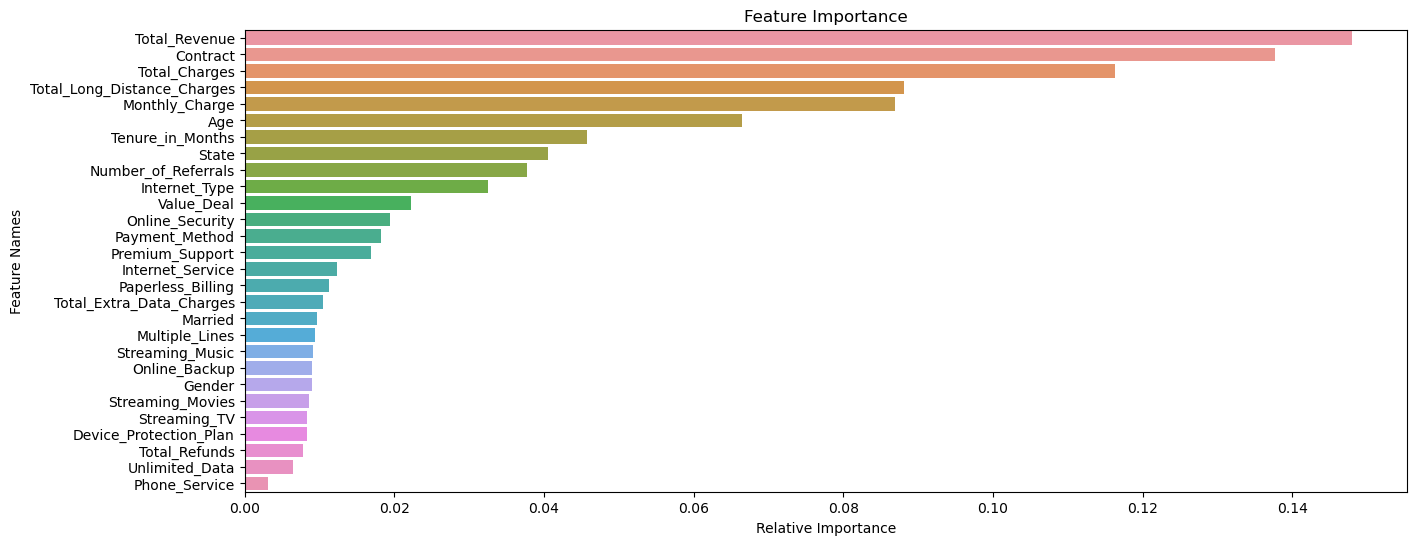

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(x=importance[indices],y=X.columns[indices])
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

## Prediction on New Data

In [70]:
filepath ="D:/Projects/Bi/predicion_data_churn.xlsx"

In [71]:
sheetname="Sheet2"

In [72]:
newdata=pd.read_excel(filepath,sheet_name=sheetname)

In [76]:
newdata.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
1,13946-HAR,Female,41,Yes,Haryana,1,3,Deal 5,Yes,No,...,Credit Card,19.650000,19.650000,0.0,0,23.670000,43.320000,Joined,Others,Others
2,14567-TAM,Male,43,No,Tamil Nadu,1,9,NaN,Yes,No,...,Credit Card,20.350000,20.350000,0.0,0,44.090000,64.440002,Joined,Others,Others
3,15591-KAR,Female,26,No,Karnataka,3,31,NaN,Yes,No,...,Credit Card,20.400000,20.400000,0.0,0,45.910000,66.309998,Joined,Others,Others
4,15803-UTT,Female,34,No,Uttar Pradesh,6,31,NaN,Yes,No,...,Credit Card,19.150000,19.150000,0.0,0,22.370001,41.520000,Joined,Others,Others


In [77]:
originaldata=newdata.copy()

In [78]:
customer_ids=newdata['Customer_ID']

In [79]:
newdata.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [80]:
newdata=newdata.drop(['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'],axis=1)

In [82]:
for column in newdata.select_dtypes(include=['object']).columns:
    newdata[column]=label_encoders[column].transform(newdata[column])

In [83]:
newdaatapredict=rfm.predict(newdata)

In [84]:
originaldata['Customer_Status_Predicted']=newdaatapredict

In [85]:
originaldata=originaldata[originaldata['Customer_Status_Predicted']==1]

In [88]:
originaldata.to_csv(r"D:/Projects/Bi/predicion_data_churn.csv")